In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0].shape 

(32, 32, 3)

In [7]:
y_train.shape 

(50000, 1)

In [8]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
 def plot_sample(index):
     plt.figure(figsize = (10,1))
     plt.imshow(X_train[index])#image show function which will show the image 

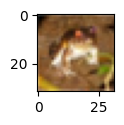

In [10]:
plot_sample(0)

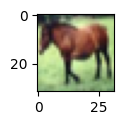

In [11]:
plot_sample(7)

In [12]:
classes = ["airplane", "automobile","bird", "cat", "deer", "frog", "horse", "ship", "truck"]

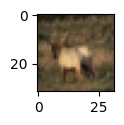

In [13]:
plot_sample(3)

In [14]:
[y_train[3]]

[array([4], dtype=uint8)]

In [15]:
classes[y_train[3][0]]

'deer'

In [16]:
X_train_scaled = X_train/255#normalize the model by 255
X_test_scaled = X_test/255

In [17]:
X_train_scaled.shape 

(50000, 32, 32, 3)

ONE HOT ENCODING 


In [18]:
 y_train_categorical = keras.utils.to_categorical(
     y_train, num_classes = 10, dtype = 'float32'
 )

In [19]:
X_train.shape 

(50000, 32, 32, 3)

In [20]:
32*32*3

3072

In [21]:
y_train[:5] 
#this is discrete value 
#when we have a discrete value then we use sparse_categorical_crossentropy 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
y_train_categorical #this is one hot encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

MODEL BUILDING 

In [24]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])
model.compile(optimizer='SGD' ,
              loss='categorical_crossentropy', #whenever we have one hot encoded output value, we use categorical_crossentropy  
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 56s 35ms/step - loss: 1.8134 - accuracy: 0.3503
Epoch 2/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6236 - accuracy: 0.4279
Epoch 3/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5419 - accuracy: 0.4558
Epoch 4/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4840 - accuracy: 0.4765
Epoch 5/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4320 - accuracy: 0.4971
Epoch 6/50
1563/1563 [==============================] - 52s 34ms/step - loss: 1.3913 - accuracy: 0.5123
Epoch 7/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3507 - accuracy: 0.5238
Epoch 8/50
1563/1563 [==============================] - 52s 34ms/step - loss: 1.3166 - accuracy: 0.5375
Epoch 9/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2820 - accuracy: 0.5491
Epoch 10/50
1563/1563 [==============================] - 52s 33m

In [41]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 2s 7ms/step


'truck'

In [39]:
classes[y_test[1][0]]

'truck'

NameError: name 'y_test_categorical' is not defined

In [53]:
# run performance test on CPU
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10,activation = 'sigmoid')
    ])
    model.compile(optimizer='SGD' ,
                  loss='categorical_crossentropy', #whenever we have one hot encoded output value, we use categorical_crossentropy  
                  metrics=['accuracy'])
    return model




In [58]:
# to run the model on cpu 
%%timeit -n1 -r1 # %%timeit will measure the time to execute 1 cell
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

UsageError: Line magic function `%%timeit` not found.
